<a href="https://colab.research.google.com/github/jisoolee11/school/blob/main/machine_learning/3_classification_w5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHAPTER 03.분류

## MNIST

In [ ]:
import numpy as np

In [ ]:
# MNIST 데이터셋을 내려받는 코드
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [ ]:
# 배열 살펴보기
X, y = mnist["data"], mnist["target"]
X.shape  # 이미지가 70000개, 784(28x28)개의 특성

(70000, 784)

In [ ]:
y.shape

(70000,)

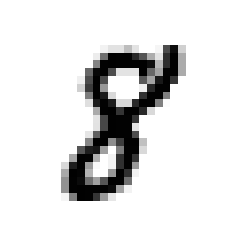

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[97]
some_digit_image = some_digit.reshape(28, 28)  # 28x28 배열로 크기를 바꾼다.

plt.imshow(some_digit_image, cmap="binary") # 이미지 보이기
plt.axis("off")
plt.show()

In [ ]:
y[97]  # 레이블 확인

'8'

In [ ]:
y = y.astype(np.uint8)  # y를 정수형으로 변환

In [ ]:
# 훈련 세트 60000개와 테스트 세트 10000개
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## 이진 분류기 훈련

In [ ]:
# 분류 작업을 위한 타깃 벡터
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
y_train_8 = (y_train == 8)
y_test_8 = (y_test == 8)

In [ ]:
# SGD(확률적 경사 하강법)를이용한 훈련
from sklearn.linear_model import SGDClassifier

sgd_clf_5 = SGDClassifier(random_state=789)
sgd_clf_8 = SGDClassifier(random_state=789)
sgd_clf_5.fit(X_train, y_train_5)
sgd_clf_8.fit(X_train, y_train_8)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=789, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# 숫자5 이미지 감지(5를 추측하지 못했다.)
sgd_clf_5.predict([some_digit])

array([False])

In [ ]:
# 숫자8 이미지 감지(8을 추측했다.)
sgd_clf_8.predict([some_digit])

array([ True])

## 성능 측정

### 교차 검증을 사용한 정확도 측정

In [ ]:
# 폴드가 3개인 k-겹 교차 검증을 사용해 SGDClassifier 모델 평가
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf_8, X_train, y_train_8, cv=3, scoring="accuracy")

array([0.89035, 0.9361 , 0.9395 ])

### 오차 행렬

In [ ]:
# cross_val_predict 함수는 k-겹 교차 검증을 수행하지만 평가 점수를 반환하지 않고 각 테스트 폴드에서 얻은 예측을 반환
# 행: 실제 클래스
# 열: 예측한 클래스
# 진짜 음성   거짓 양성
# 거짓 음성   진짜 양성
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf_8, X_train, y_train_8, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_8, y_train_pred)

array([[51579,  2570],
       [ 2111,  3740]])

In [ ]:
# 완벽한 분류기인 경우
y_train_perfect_predictions = y_train_8
confusion_matrix(y_train_8, y_train_perfect_predictions)

array([[54149,     0],
       [    0,  5851]])

### 정밀도와 재현율

In [ ]:
# 분류기의 지표를 계산하는 함수
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_8, y_train_pred)

0.5927099841521395

In [ ]:
recall_score(y_train_8, y_train_pred)

0.63920697316698

In [ ]:
# 조화평균
from sklearn.metrics import f1_score
f1_score(y_train_8, y_train_pred)

0.6150809966285667

### 정밀도/재현율 트레이드오프

In [ ]:
# 샘플의 점수를 기반으로 원하는 임곗값을 정해 예측을 만든다
y_scores = sgd_clf_8.decision_function([some_digit])
y_scores

array([1482.33827729])

In [ ]:
# cross_val_predict() 함수를 사용해 훈련 세트에 있는 모든 샘플의 점수를 구한다
y_scores = cross_val_predict(sgd_clf_8, X_train, y_train_8, cv=3,
                             method="decision_function")

In [ ]:
# precision_recall_curve() 함수를 사용하여 가능한 모든 임곗값에 대해 정밀도와 재현율을 계산할 수 있다
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_8, y_scores)

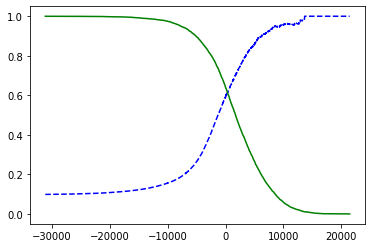

In [ ]:
# 정밀도와 재현율 그림으로 보이기
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="정밀도") #blue를 점선으로 그려라
  plt.plot(thresholds, recalls[:-1], "g-", label="재현율") #green을 실선으로 그려라

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

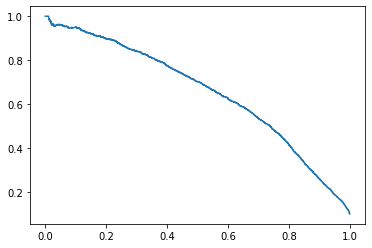

In [ ]:
# 재현율에 대한 정밀도 곡선
plt.plot(recalls, precisions)
plt.show()

In [ ]:
# 최소 90%정밀도가 되는 가장 낮은 임계값 찾기
threshold_90_precision =thresholds[np.argmax(precisions >= 0.90)]

In [ ]:
# 훈련 세트에 대한 예측
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [ ]:
# 정밀도 예측
precision_score(y_train_8, y_train_pred_90)

0.9003139717425431

In [ ]:
# 재현율 예측
recall_score(y_train_8, y_train_pred_90)

0.1960348658349

### ROC 곡선

In [ ]:
# roc_curve() 함수를 사용해 여러 임곗값에서 진짜 양성 비율(TPR)과 거짓 양성 비율(FPR)을 계산
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_8, y_scores)

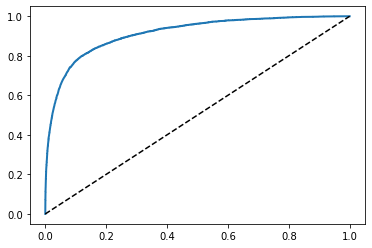

In [ ]:
# TPR에 대한 FPR 곡선 그리기
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')  # 대각 점선

plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
# 곡선 아래 면적(AUC) 측정
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_8, y_scores)

0.9127876136122361

In [ ]:
# RandomForestClassifier를 훈련시켜 SGDClassifier의 ROC 곡선과 ROC AUC 점수 비교하기
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_8, cv=3,
                                    method="predict_proba")

In [ ]:
# 양성 클래스 확률을 점수로 사용
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_8, y_scores_forest)

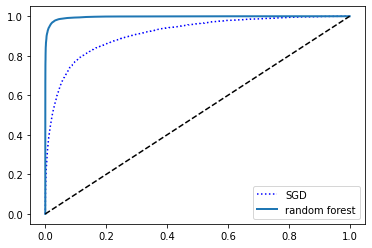

In [ ]:
# ROC곡선 그리기
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "random forest")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# 곡선 아래 면적(AUC) 측정
roc_auc_score(y_train_8, y_scores_forest)

0.9965481456893603

## 다중 분류

In [ ]:
# 서포트 벡터 머신 분류기 테스트
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train[:1000], y_train[:1000])
svm_clf.predict([some_digit])

array([8], dtype=uint8)

In [ ]:
# decision_function()메서드를 호출하면 샘플당 10개의 점수를 반환한다(클래스당 하나)
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 0.72391321,  2.78359448,  3.89068228,  8.20284806,  1.74882031,
         6.1645681 , -0.28176804,  4.80286464,  9.3087424 ,  7.22389473]])

In [ ]:
np.argmax(some_digit_scores)

8

In [ ]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
svm_clf.classes_[8]

8

In [ ]:
# SVC 기반으로 OvR전략을 사용하는 다중 분류기
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])

array([8], dtype=uint8)

In [ ]:
len(ovr_clf.estimators_)

10

In [ ]:
# SGDClassifier 훈련
sgd_clf_8.fit(X_train, y_train)
sgd_clf_8.predict([some_digit])

array([8], dtype=uint8)

In [ ]:
# SGD 분류기가 클래스마다 부여한 점수를 확인
sgd_clf_8.decision_function([some_digit])

array([[-27862.93468932, -16161.89359274, -12383.06646425,
         -4263.63634827, -11157.48870299,  -7601.9790338 ,
        -29239.74495338, -12483.15698726,   2245.32260506,
         -3340.84478032]])

In [ ]:
# SGDClassifier의 정확도 평가
cross_val_score(sgd_clf_8, X_train, y_train, cv=3, scoring="accuracy")

array([0.87735, 0.8802 , 0.8843 ])

In [ ]:
# 입력 스케일을 조정하여 정확도 높이기
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf_8, X_train_scaled, y_train, cv=3, scoring="accuracy")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.90305, 0.89575, 0.90435])

## 에러 분석

In [ ]:
y_train_pred = cross_val_predict(sgd_clf_8, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[5598,    0,   25,    7,    9,   51,   36,    6,  190,    1],
       [   0, 6415,   40,   25,    5,   45,    4,    8,  189,   11],
       [  28,   27, 5268,   96,   72,   27,   69,   40,  320,   11],
       [  24,   19,  124, 5245,    2,  224,   27,   42,  349,   75],
       [  12,   14,   52,   11, 5218,   11,   35,   26,  293,  170],
       [  30,   17,   36,  177,   56, 4494,   74,   17,  456,   64],
       [  29,   16,   46,    2,   43,   99, 5563,    3,  116,    1],
       [  20,   10,   54,   32,   52,   12,    3, 5713,  156,  213],
       [  19,   69,   47,   92,    4,  138,   25,   10, 5399,   48],
       [  24,   19,   32,   69,  118,   37,    1,  182,  317, 5150]])

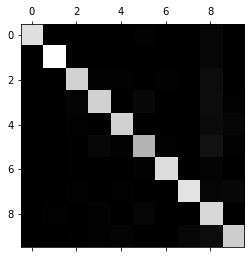

In [ ]:
# 오차 행렬을 이미지로 출력
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
# 오차 행렬의 각 값을 대응되는 클래스의 이미지 개수로 나눈다
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

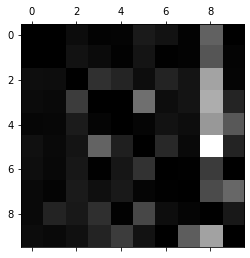

In [ ]:
# 그래프화
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

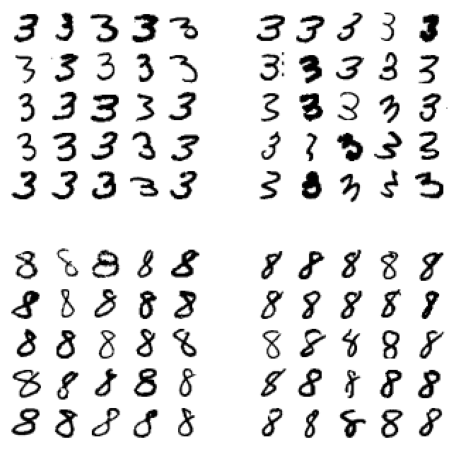

In [ ]:
# 에러 분석
cl_a, cl_b = 3, 8
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()